In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
import networkx as nx

In [62]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [63]:
G = nx.Graph()

G.name = "Grafito"

G.add_nodes_from(['Tec', 
                  'Andares',
                  'Galerias',
                  'UAG',
                  'Colomos',
                  'PA', # Periferico y Acueducto
                  'RC', # Real Center
                  'LcP', # Lazaro Cardenas y Periferico
                  'Trompo' # Trompo Mágico
                   ])

G.add_edge('Tec','RC', weight = 8 )
G.add_edge('Tec','LcP', weight = 8 )
G.add_edge('RC','Trompo', weight = 2 )
G.add_edge('Trompo','PA', weight = 2 )
G.add_edge('LcP','PA', weight = 10 )
G.add_edge('LcP','Galerias', weight = 12 )
G.add_edge('Galerias','UAG', weight = 10 )
G.add_edge('UAG','Andares', weight = 5 )
G.add_edge('Andares','Colomos', weight = 5 )
G.add_edge('Andares','PA', weight = 5 )


In [64]:
print(nx.info(G))

Name: Grafito
Type: Graph
Number of nodes: 9
Number of edges: 10
Average degree:   2.2222


In [65]:
#list(G.nodes)

In [66]:
for i in G.nodes:
    print("\nConexiones desde "+ i +" :")
    print(list(G.edges(i)))


Conexiones desde Tec :
[('Tec', 'RC'), ('Tec', 'LcP')]

Conexiones desde Andares :
[('Andares', 'UAG'), ('Andares', 'Colomos'), ('Andares', 'PA')]

Conexiones desde Galerias :
[('Galerias', 'LcP'), ('Galerias', 'UAG')]

Conexiones desde UAG :
[('UAG', 'Galerias'), ('UAG', 'Andares')]

Conexiones desde Colomos :
[('Colomos', 'Andares')]

Conexiones desde PA :
[('PA', 'Trompo'), ('PA', 'LcP'), ('PA', 'Andares')]

Conexiones desde RC :
[('RC', 'Tec'), ('RC', 'Trompo')]

Conexiones desde LcP :
[('LcP', 'Tec'), ('LcP', 'PA'), ('LcP', 'Galerias')]

Conexiones desde Trompo :
[('Trompo', 'RC'), ('Trompo', 'PA')]


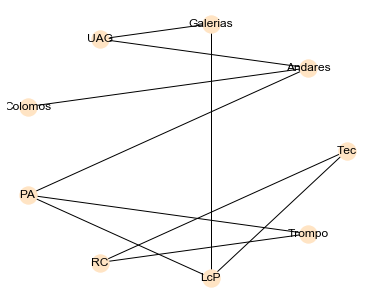

In [68]:
nx.draw_circular(G, node_color='bisque', with_labels=True)

In [71]:
list(G.neighbors('UAG'))

['Galerias', 'Andares']

In [72]:
nx.dijkstra_path(G,'Tec','Galerias')

['Tec', 'LcP', 'Galerias']

In [73]:
nx.dijkstra_path(G,'Tec','Colomos')

['Tec', 'RC', 'Trompo', 'PA', 'Andares', 'Colomos']

In [74]:
list(nx.dfs_edges(G,'Tec'))

[('Tec', 'RC'),
 ('RC', 'Trompo'),
 ('Trompo', 'PA'),
 ('PA', 'LcP'),
 ('LcP', 'Galerias'),
 ('Galerias', 'UAG'),
 ('UAG', 'Andares'),
 ('Andares', 'Colomos')]

In [75]:
def dfs(G, v):
    nodes = [v]
    visited=set()
    for start in nodes:
        if start in visited:
             continue
        visited.add(start)
        stack = [(start,iter(G[start]))]
        while stack:
            parent,children = stack[-1]
            try:
                child = next(children)
                if child not in visited:
                    yield parent,child
                    visited.add(child)
                    stack.append((child,iter(G[child])))
            except StopIteration:
                stack.pop()
                
path = dfs(G,'Tec')
for p in path:
    print(p, end = ' ')

('Tec', 'RC') ('RC', 'Trompo') ('Trompo', 'PA') ('PA', 'LcP') ('LcP', 'Galerias') ('Galerias', 'UAG') ('UAG', 'Andares') ('Andares', 'Colomos') 

In [76]:
def dijsktra_path(G, v, d):
  visited = {v : 0}
  path = {}

  nodes = set(list(G.nodes))

  while nodes: 
    min_node = None
    for node in nodes:
      if node in visited:
        if min_node is None:
          min_node = node
        elif visited[node] < visited[min_node]:
          min_node = node

    if min_node is None:
      break

    nodes.remove(min_node)
    current_weight = visited[min_node]

    for edge in G.edges(min_node):
      peso = current_weight + G.get_edge_data(min_node, edge)
      if edge not in visited or weight < visited[edge]:
        visited[edge] = peso
        path[edge] = min_node

  return visited, path 

nx.dijkstra_path(G,'Tec','Colomos')

['Tec', 'RC', 'Trompo', 'PA', 'Andares', 'Colomos']

In [ ]:
#G.get_edge_data('A','B')['weight']